# Introduction to Convolutional Neural Networks


** Ecole Centrale Nantes **

** Diana Mateus **


** Participants : **
## Raphael Blanchard, So Onishi


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import h5py

### 0. Loading the dataset
Start by runing the following lines to load and visualize the data.

In [2]:
# UNCOMMENT IF USING COLAB
# from google.colab import drive
# drive.mount('/content/drive')
IMDIR = './dataset/'

In [3]:
def load_dataset(IMDIR):
    train_dataset = h5py.File(IMDIR+'dataset/train_catvnoncat.h5', "r")
    train_x = np.array(train_dataset["train_set_x"][:])
    train_y = np.array(train_dataset["train_set_y"][:])
    test_dataset = h5py.File(IMDIR+'dataset/test_catvnoncat.h5', "r")
    test_x = np.array(test_dataset["test_set_x"][:])
    test_y = np.array(test_dataset["test_set_y"][:])
    classes = np.array(test_dataset["list_classes"][:])

    train_y = train_y.reshape((1, train_y.shape[0]))
    test_y = test_y.reshape((1, test_y.shape[0]))

    return train_x, train_y, test_x, test_y, classes

train_x, train_y, test_x, test_y, classes=load_dataset(IMDIR)

#### Visualize data

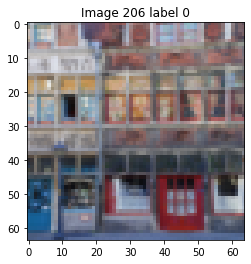

Train X shape: (209, 64, 64, 3)
We have 209 images of dimensionality 64x64x3


In [4]:
# run several times to visualize different data points
# the title shows the ground truth class labels (0=no cat , 1 = cat)
index = np.random.randint(low=0,high=train_y.shape[1])
plt.imshow(train_x[index])
plt.title("Image "+str(index)+" label "+str(train_y[0,index]))
plt.show()
print ("Train X shape: " + str(train_x.shape))
print ("We have "+str(train_x.shape[0]),
       "images of dimensionality "
       + str(train_x.shape[1])+ "x"
       + str(train_x.shape[2])+ "x"
       + str(train_x.shape[3]))

### 1. CNNs with Keras and Tensorflow

Adapt the example in this website https://keras.io/examples/vision/mnist_convnet/ to our problem. To this end:
- change the number of classes and the input size
- remove the expand_dims(x_train, -1): it is not necessary to expand the dimensions since our input has already three channels
- you may need to transpose the labels vector
- change the categorical cross-entropy to the binary cross entropy given that our problem is binary classification.
- also change the softmax to sigmoid, the more appropriate activation function for binary data

We can choose a single neuron output passed through sigmoid, and then set a threshold to choose the class, or use two neuron output and then perform a softmax.

**2.2** Compute the train and test loss and accuracy after the model has been trained.  What model parameters does the ``fit`` function retain?

**2.3** How many parameters does the network have, explain  the exact number .

**2.4** Display and discuss the ROC curve of at least 3 different CNN configurations  


In [5]:
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers

In [6]:
# the data, split between train and test sets
x_train, y_train, x_test, y_test, classes=load_dataset(IMDIR=IMDIR)

num_classes = 2
input_shape = (64, 64, 3)

# Scale images to the [0, 1] range
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255

# convert class vectors to binary class matrices
y_train = y_train.T
y_test = y_test.T

non_onehot_y_test = y_test


# doing the one hot encoding of our classes
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)



In [7]:
#build the model
model = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation="sigmoid"),
    ]
)
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 31, 31, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 14, 14, 64)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 12544)             0         
                                                                 
 dropout (Dropout)           (None, 12544)             0

## Number of params:

44482 params

Explanation in the report

In [8]:
#compile and fit
batch_size = 128
epochs = 200

model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)

Epoch 1/200


2/2 [==============================] - 1s 187ms/step - loss: 0.6710 - accuracy: 0.5957 - val_loss: 0.5199 - val_accuracy: 0.8095
Epoch 2/200
2/2 [==============================] - 0s 83ms/step - loss: 0.6486 - accuracy: 0.6383 - val_loss: 0.5335 - val_accuracy: 0.8095
Epoch 3/200
2/2 [==============================] - 0s 85ms/step - loss: 0.6185 - accuracy: 0.6383 - val_loss: 0.5403 - val_accuracy: 0.8095
Epoch 4/200
2/2 [==============================] - 0s 88ms/step - loss: 0.5965 - accuracy: 0.6383 - val_loss: 0.5220 - val_accuracy: 0.8095
Epoch 5/200
2/2 [==============================] - 0s 88ms/step - loss: 0.5819 - accuracy: 0.6383 - val_loss: 0.5107 - val_accuracy: 0.8095
Epoch 6/200
2/2 [==============================] - 0s 86ms/step - loss: 0.5661 - accuracy: 0.6383 - val_loss: 0.5031 - val_accuracy: 0.8095
Epoch 7/200
2/2 [==============================] - 0s 86ms/step - loss: 0.5479 - accuracy: 0.6436 - val_loss: 0.5158 - val_accuracy: 0.8095
Epoch 8/200
2/2 [==============

In [9]:
#evaluate
training_score = model.evaluate(x_train, y_train, verbose=0)
print("Train loss:", training_score[0], " /\ Train accuracy:", training_score[1])
score = model.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0], "/\ Test accuracy:", score[1])

Train loss: 0.14338696002960205  /\ Train accuracy: 0.9760765433311462
Test loss: 1.0969929695129395 /\ Test accuracy: 0.8199999928474426


In [10]:
# Defining other models
# We saw there was a big difference between the training and val accuracy, meaning we lack generalization

model2 = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.Dropout(0.25),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.Dropout(0.25),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation="sigmoid"),
    ]
)

model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 62, 62, 32)        896       
                                                                 
 dropout_1 (Dropout)         (None, 62, 62, 32)        0         
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 31, 31, 32)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 29, 29, 64)        18496     
                                                                 
 dropout_2 (Dropout)         (None, 29, 29, 64)        0         
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 14, 14, 64)       0         
 2D)                                                  

In [11]:
#compile and fit
batch_size = 128
epochs = 50

model2.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

model2.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)

Epoch 1/50


2/2 [==============================] - 1s 221ms/step - loss: 0.7094 - accuracy: 0.5266 - val_loss: 0.5629 - val_accuracy: 0.8095
Epoch 2/50
2/2 [==============================] - 0s 131ms/step - loss: 0.6743 - accuracy: 0.6383 - val_loss: 0.5982 - val_accuracy: 0.8095
Epoch 3/50
2/2 [==============================] - 0s 124ms/step - loss: 0.6279 - accuracy: 0.6383 - val_loss: 0.6021 - val_accuracy: 0.8095
Epoch 4/50
2/2 [==============================] - 0s 134ms/step - loss: 0.6052 - accuracy: 0.6383 - val_loss: 0.5549 - val_accuracy: 0.8095
Epoch 5/50
2/2 [==============================] - 0s 133ms/step - loss: 0.5825 - accuracy: 0.6383 - val_loss: 0.5439 - val_accuracy: 0.8095
Epoch 6/50
2/2 [==============================] - 0s 129ms/step - loss: 0.5417 - accuracy: 0.6436 - val_loss: 0.5254 - val_accuracy: 0.8095
Epoch 7/50
2/2 [==============================] - 0s 132ms/step - loss: 0.5118 - accuracy: 0.6702 - val_loss: 0.5199 - val_accuracy: 0.7619
Epoch 8/50
2/2 [===============

In [12]:
#evaluate
training_score = model2.evaluate(x_train, y_train, verbose=0)
print("Train loss:", training_score[0], " /\ Train accuracy:", training_score[1])
score = model2.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0], "/\ Test accuracy:", score[1])

Train loss: 0.20309080183506012  /\ Train accuracy: 0.9569377899169922
Test loss: 0.4771917760372162 /\ Test accuracy: 0.800000011920929


## Model 2 results

We can see that by simply adding 2 dropout layers which will help with regularization, we go from 0.71 val acc to 0.81

In [13]:
model3 = keras.Sequential([
    keras.Input(shape=input_shape),
    layers.Conv2D(32, kernel_size=3, strides=1, padding='same', activation='relu', input_shape=input_shape),
    layers.Conv2D(64, kernel_size=3, strides=1, padding='same', activation='relu', input_shape=input_shape),
    layers.MaxPooling2D(pool_size=2, strides=2),
    layers.Dropout(0.25),

    
    layers.Conv2D(64, kernel_size=3, strides=1, padding='same', activation='relu'),
    layers.Conv2D(128, kernel_size=3, strides=1, padding='same', activation='relu'),
    layers.MaxPooling2D(pool_size=2, strides=2),
    layers.Dropout(0.25),


    layers.Conv2D(256, kernel_size=3, strides=1, padding='same', activation='relu'),
    layers.Conv2D(512, kernel_size=3, strides=1, padding='same', activation='relu'),
    layers.MaxPooling2D(pool_size=2, strides=2),
    
    layers.Flatten(),
    
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.1),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(num_classes, activation='sigmoid')
])

model3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 64, 64, 32)        896       
                                                                 
 conv2d_5 (Conv2D)           (None, 64, 64, 64)        18496     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 32, 32, 64)       0         
 2D)                                                             
                                                                 
 dropout_4 (Dropout)         (None, 32, 32, 64)        0         
                                                                 
 conv2d_6 (Conv2D)           (None, 32, 32, 64)        36928     
                                                                 
 conv2d_7 (Conv2D)           (None, 32, 32, 128)       73856     
                                                      

In [14]:
#compile and fit
batch_size = 32
epochs = 30

model3.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

model3.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)

Epoch 1/30
6/6 [==============================] - 4s 422ms/step - loss: 0.6854 - accuracy: 0.6170 - val_loss: 0.6056 - val_accuracy: 0.8095
Epoch 2/30
6/6 [==============================] - 2s 392ms/step - loss: 0.6520 - accuracy: 0.6223 - val_loss: 0.6263 - val_accuracy: 0.8095
Epoch 3/30
6/6 [==============================] - 2s 391ms/step - loss: 0.5911 - accuracy: 0.6330 - val_loss: 0.5729 - val_accuracy: 0.8095
Epoch 4/30
6/6 [==============================] - 2s 373ms/step - loss: 0.5520 - accuracy: 0.6383 - val_loss: 0.6057 - val_accuracy: 0.8095
Epoch 5/30
6/6 [==============================] - 2s 377ms/step - loss: 0.4970 - accuracy: 0.6383 - val_loss: 0.6391 - val_accuracy: 0.8095
Epoch 6/30
6/6 [==============================] - 2s 368ms/step - loss: 0.4453 - accuracy: 0.6543 - val_loss: 0.6606 - val_accuracy: 0.8095
Epoch 7/30
6/6 [==============================] - 2s 380ms/step - loss: 0.4684 - accuracy: 0.7021 - val_loss: 0.6936 - val_accuracy: 0.8095
Epoch 8/30
6/6 [====

In [15]:
#evaluate
training_score = model3.evaluate(x_train, y_train, verbose=0)
print("Train loss:", training_score[0], " /\ Train accuracy:", training_score[1])
score = model3.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0], "/\ Test accuracy:", score[1])

Train loss: 0.5310593843460083  /\ Train accuracy: 0.8755980730056763
Test loss: 2.174846887588501 /\ Test accuracy: 0.8199999928474426


In [16]:
from tensorflow.keras.layers import Conv2D, BatchNormalization, Activation, Add

def resnet_block(x, filters, kernel_size=3, stride=1):
    # Shortcut
    shortcut = x
    
    # First convolution layer
    x = Conv2D(filters[0], kernel_size=(1, 1), strides=(stride, stride), padding='valid')(x)
    x = Activation('relu')(x)
    
    # Second convolution layer
    x = Conv2D(filters[1], kernel_size=(kernel_size, kernel_size), strides=(1, 1), padding='same')(x)
    x = Activation('relu')(x)
    
    # Third convolution layer
    x = Conv2D(filters[2], kernel_size=(1, 1), strides=(1, 1), padding='valid')(x)
    
    # Shortcut connection
    shortcut = Conv2D(filters[2], kernel_size=(1, 1), strides=(stride, stride), padding='valid')(shortcut)
    
    # Add shortcut and main path
    x = Add()([x, shortcut])
    x = Activation('relu')(x)
    
    return x

In [17]:
input_layer = keras.Input(shape=input_shape)

# Initial Convolutional layer
x = layers.Conv2D(64, kernel_size=(7, 7), strides=(2, 2), padding='same')(input_layer)
x = layers.Activation('relu')(x)

# ResNet Blocks
x = resnet_block(x, filters=[64, 64, 256], stride=1)
x = resnet_block(x, filters=[64, 64, 256], stride=1)
x = resnet_block(x, filters=[128, 128, 512], stride=2)

# Global Average Pooling
x = layers.GlobalAveragePooling2D()(x)

# Output layer
output_layer = layers.Dense(num_classes, activation='sigmoid')(x)  # 2 classes for binary classification

# Create the model
resnet_model = keras.Model(inputs=input_layer, outputs=output_layer)

resnet_model.summary()


Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_4 (InputLayer)           [(None, 64, 64, 3)]  0           []                               
                                                                                                  
 conv2d_10 (Conv2D)             (None, 32, 32, 64)   9472        ['input_4[0][0]']                
                                                                                                  
 activation (Activation)        (None, 32, 32, 64)   0           ['conv2d_10[0][0]']              
                                                                                                  
 conv2d_11 (Conv2D)             (None, 32, 32, 64)   4160        ['activation[0][0]']             
                                                                                              

In [18]:
from keras import backend as K

#compile and fit
batch_size = 128
epochs = 30

# use a bigger learning rate than default
optimizer = keras.optimizers.Adam(lr=0.01)
resnet_model.compile(loss="binary_crossentropy", optimizer=optimizer, metrics=["accuracy"])
resnet_model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)

K.set_value(resnet_model.optimizer.learning_rate, 0.001)
# fine tuning with a smaller learning rate
resnet_model.fit(x_train, y_train, batch_size=batch_size, epochs=10, validation_split=0.1)


Epoch 1/30
2/2 [==============================] - 3s 659ms/step - loss: 0.6908 - accuracy: 0.6383 - val_loss: 0.6143 - val_accuracy: 0.8095
Epoch 2/30
2/2 [==============================] - 1s 511ms/step - loss: 0.6569 - accuracy: 0.6383 - val_loss: 0.5340 - val_accuracy: 0.8095
Epoch 3/30
2/2 [==============================] - 1s 512ms/step - loss: 0.6565 - accuracy: 0.6383 - val_loss: 0.5662 - val_accuracy: 0.8095
Epoch 4/30
2/2 [==============================] - 1s 501ms/step - loss: 0.6403 - accuracy: 0.6383 - val_loss: 0.5621 - val_accuracy: 0.8095
Epoch 5/30
2/2 [==============================] - 1s 579ms/step - loss: 0.6256 - accuracy: 0.6383 - val_loss: 0.5465 - val_accuracy: 0.8095
Epoch 6/30
2/2 [==============================] - 2s 518ms/step - loss: 0.5991 - accuracy: 0.6383 - val_loss: 0.5052 - val_accuracy: 0.8095
Epoch 7/30
2/2 [==============================] - 1s 497ms/step - loss: 0.5547 - accuracy: 0.6383 - val_loss: 0.5131 - val_accuracy: 0.8095
Epoch 8/30
2/2 [====

In [19]:
#evaluate
training_score = resnet_model.evaluate(x_train, y_train, verbose=0)
print("Train loss:", training_score[0], " /\ Train accuracy:", training_score[1])
score = resnet_model.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0], "/\ Test accuracy:", score[1])

Train loss: 0.4551968276500702  /\ Train accuracy: 0.7559808492660522
Test loss: 1.2162145376205444 /\ Test accuracy: 0.6000000238418579


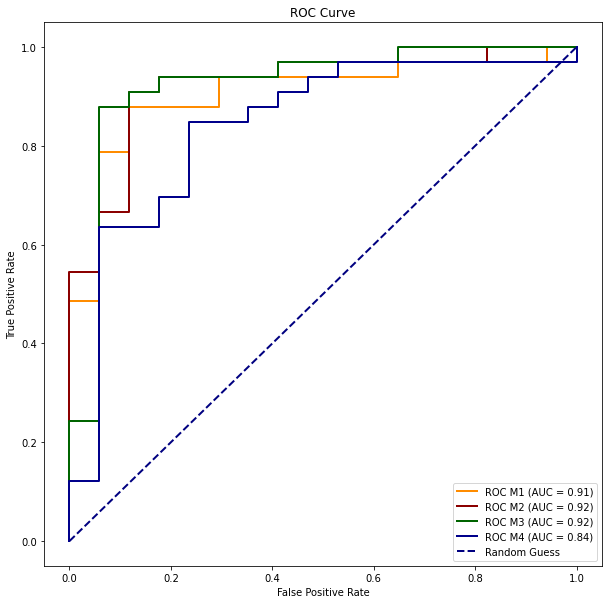

In [20]:
# ROC curves
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense

# Assuming you have a Keras model named 'model' and data (X, y) for binary classification
# Split the data into training and test sets
# Train your Keras model on the training data

# Obtain predicted probabilities for the test set
# baseline
y_prob_model1 = model.predict(x_test, verbose=False)
# tweaked baseline
y_prob_model2 = model2.predict(x_test, verbose=False)
# more conv layers
y_prob_model3 = model3.predict(x_test, verbose=False)
# resnet
y_prob_resnet = resnet_model.predict(x_test, verbose=False)

# compute all ROC and AUC
fpr_m1, tpr_m1, thresholds_m1 = roc_curve(non_onehot_y_test, y_prob_model1[:,1])
roc_auc_m1 = auc(fpr_m1, tpr_m1)

fpr_m2, tpr_m2, thresholds_m2 = roc_curve(non_onehot_y_test, y_prob_model2[:,1])
roc_auc_m2 = auc(fpr_m2, tpr_m2)

fpr_m3, tpr_m3, thresholds_m3 = roc_curve(non_onehot_y_test, y_prob_model3[:,1])
roc_auc_m3 = auc(fpr_m3, tpr_m3)

fpr_res, tpr_res, thresholds_res = roc_curve(non_onehot_y_test, y_prob_resnet[:,1])
roc_auc_res = auc(fpr_res, tpr_res)


# Plot the ROC curve
plt.figure(figsize=(10,10))

# plotting all the roc_curved
plt.plot(fpr_m1, tpr_m1, color='darkorange', lw=2, label='ROC M1 (AUC = {:.2f})'.format(roc_auc_m1))
plt.plot(fpr_m2, tpr_m2, color='darkred', lw=2, label='ROC M2 (AUC = {:.2f})'.format(roc_auc_m2))
plt.plot(fpr_m3, tpr_m3, color='darkgreen', lw=2, label='ROC M3 (AUC = {:.2f})'.format(roc_auc_m3))
plt.plot(fpr_res, tpr_res, color='darkblue', lw=2, label='ROC M4 (AUC = {:.2f})'.format(roc_auc_res))

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random Guess')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()


## 2 Custom training loop (OPTIONAL ARTIN)
Replace the fit function by your own tensorflow  implementation

- Instantiate one of keras.optimizers to train the model.

- Instantiate a loss from keras.losses

- Define the metrics (from keras.metrics)

- Use `tf.data.Dataset.from_tensor_slices` to create an iterable dataset from a numpy arrays. Do this for the training and test datasets.

- Change the model (optional, after the training loop runs to optimize the performance)

- Program a loop over a fixed number of epochs,
    * For each epoch iterating over the batches
    * Within a `GradientTape()` scope,
      - do a forward pass on the model for the current batch (call the model on the batch data)
      - Compute the loss
      - Compute the gradients of the loss w.r.t parameters
      - Call the optimimzer to update the weights with computed the gradients
    * At the end of each epoch compute the validation metrics


Look at https://www.tensorflow.org/tutorials/customization/custom_training_walkthrough specifically at the TRAINING LOOP SECTION
for a recent documentation on custom training.


In [21]:
# Redefining the model to make it "forget" the training
model = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation="sigmoid"),
    ]
)

In [22]:
import tensorflow as tf

# Convert the training and test data to tf.data.Dataset objects
train_dataset = tf.data.Dataset.from_tensor_slices((x_train, y_train)).shuffle(buffer_size=1024).batch(32)
test_dataset = tf.data.Dataset.from_tensor_slices((x_test, y_test)).batch(32)

# Instantiate a model, optimizer, and loss function
# here redefining my current model with the first model used (baseline)
model = model
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
loss_object = tf.keras.losses.CategoricalCrossentropy(from_logits=True)

train_loss = tf.keras.metrics.Mean(name='train_loss')
train_accuracy = tf.keras.metrics.CategoricalAccuracy(name='train_accuracy')
test_loss = tf.keras.metrics.Mean(name='test_loss')
test_accuracy = tf.keras.metrics.CategoricalAccuracy(name='test_accuracy')

# Defining my own train_step function that is called during the training of keras
# Overwriting the tf function
@tf.function
def train_step(images, labels):
    with tf.GradientTape() as tape:
        predictions = model(images, training=True)
        loss = loss_object(labels, predictions)
    gradients = tape.gradient(loss, model.trainable_variables)
    optimizer.apply_gradients(zip(gradients, model.trainable_variables))

    train_loss(loss)
    train_accuracy(labels, predictions)

# Same for the test 
@tf.function
def test_step(images, labels):
    predictions = model(images, training=False)
    t_loss = loss_object(labels, predictions)

    test_loss(t_loss)
    test_accuracy(labels, predictions)

# Training loop
# definining the number of epochs for which I want to train my model
epochs = 50

for epoch in range(epochs):
    # Reset the metrics at the start of the next epoch
    train_loss.reset_states()
    train_accuracy.reset_states()
    test_loss.reset_states()
    test_accuracy.reset_states()

    # iterating through the images and using the training step previoyusly defined
    for images, labels in train_dataset:
        train_step(images, labels)

    for test_images, test_labels in test_dataset:
        test_step(test_images, test_labels)

    template = 'Epoch {}, Loss: {}, Accuracy: {}, Test Loss: {}, Test Accuracy: {}'
    print(template.format(epoch+1,
                          train_loss.result(),
                          train_accuracy.result()*100,
                          test_loss.result(),
                          test_accuracy.result()*100))


c:\Users\rapha\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\backend.py:5561: UserWarning: "`categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


Epoch 1, Loss: 0.7054014801979065, Accuracy: 62.67942810058594, Test Loss: 0.6877437829971313, Test Accuracy: 44.0
Epoch 2, Loss: 0.6372664570808411, Accuracy: 65.55023956298828, Test Loss: 0.9353318214416504, Test Accuracy: 34.0
Epoch 3, Loss: 0.5806545615196228, Accuracy: 65.55023956298828, Test Loss: 0.8009200096130371, Test Accuracy: 34.0
Epoch 4, Loss: 0.523252010345459, Accuracy: 69.37799072265625, Test Loss: 0.5472524166107178, Test Accuracy: 76.0
Epoch 5, Loss: 0.4831828773021698, Accuracy: 73.20574188232422, Test Loss: 0.5012229681015015, Test Accuracy: 76.0
Epoch 6, Loss: 0.4135550856590271, Accuracy: 81.33971405029297, Test Loss: 0.6226404309272766, Test Accuracy: 60.000003814697266
Epoch 7, Loss: 0.3639909625053406, Accuracy: 81.33971405029297, Test Loss: 0.6629587411880493, Test Accuracy: 62.0
Epoch 8, Loss: 0.3636103570461273, Accuracy: 85.16746520996094, Test Loss: 1.8720717430114746, Test Accuracy: 34.0
Epoch 9, Loss: 0.5139673948287964, Accuracy: 76.07655334472656, Tes

ADITIONAL BONUS
- Early stopping
- Tensorboard
- CAM/GradCAM

In [23]:
# Redefining the model to make it "forget" the training
model = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation="sigmoid"),
    ]
)

In [24]:
# defining when the model should stop, here when the val_loss doesn't get better
# creating the early stopping and tensorboard callbacks
early_stopping_callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=8)
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir="./logs")
batch_size = 32

model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

history = model.fit(
    x_train, y_train,
    epochs=30,  # Assume some large number of epochs
    batch_size=batch_size, 
    validation_split=0.1,
    callbacks=[early_stopping_callback, tensorboard_callback]
)

Epoch 1/30
6/6 [==============================] - 1s 58ms/step - loss: 0.6624 - accuracy: 0.5957 - val_loss: 0.5695 - val_accuracy: 0.8095
Epoch 2/30
6/6 [==============================] - 0s 40ms/step - loss: 0.5974 - accuracy: 0.6383 - val_loss: 0.4966 - val_accuracy: 0.8095
Epoch 3/30
6/6 [==============================] - 0s 44ms/step - loss: 0.5389 - accuracy: 0.6383 - val_loss: 0.4722 - val_accuracy: 0.8095
Epoch 4/30
6/6 [==============================] - 0s 43ms/step - loss: 0.4950 - accuracy: 0.6862 - val_loss: 0.4959 - val_accuracy: 0.7143
Epoch 5/30
6/6 [==============================] - 0s 44ms/step - loss: 0.4496 - accuracy: 0.7713 - val_loss: 0.5245 - val_accuracy: 0.8095
Epoch 6/30
6/6 [==============================] - 0s 44ms/step - loss: 0.4694 - accuracy: 0.7287 - val_loss: 0.5680 - val_accuracy: 0.7143
Epoch 7/30
6/6 [==============================] - 0s 42ms/step - loss: 0.4363 - accuracy: 0.7394 - val_loss: 0.5531 - val_accuracy: 0.7143
Epoch 8/30
6/6 [===========

In [25]:
%load_ext tensorboard
%tensorboard --logdir logs

Reusing TensorBoard on port 6006 (pid 15996), started 0:20:38 ago. (Use '!kill 15996' to kill it.)